In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Build model using LinearRegression**

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:

cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'highway-mpg', 'price'],
      dtype='object')

In [5]:
y = cars['price']
X = cars.drop(columns=['price'])

In [6]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,curb-weight,engine-size,highway-mpg
122,porsche,gas,two,hatchback,rwd,2778,151,27
131,saab,gas,four,sedan,fwd,2758,121,28
45,jaguar,gas,four,sedan,rwd,4066,258,19
60,mazda,diesel,four,sedan,fwd,2443,122,42
129,saab,gas,four,sedan,fwd,2695,121,28


In [7]:
X  = pd.get_dummies(X)

In [8]:
X.shape,y.shape

((201, 37), (201,))

In [9]:
X.columns

Index(['curb-weight', 'engine-size', 'highway-mpg', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

curb-weight               6
engine-size               36
highway-mpg               -61
make_alfa-romero          -2153
make_audi                 2658
make_bmw                  7931
make_chevrolet            -121
make_dodge                -2116
make_honda                -1250
make_isuzu                -6058
make_jaguar               6193
make_mazda                -1128
make_mercedes-benz        6816
make_mercury              -1083
make_mitsubishi           -2902
make_nissan               -1874
make_peugot               -3491
make_plymouth             -2727
make_porsche              11762
make_renault              -3278
make_saab                 -340
make_subaru               -2340
make_toyota               -2902
make_volkswagen           -1492
make_volvo                -105
fuel-type_diesel          -15
fuel-type_gas             15
num-of-doors_four         33
num-of-doors_two          -33
body-style_convertible    2856
body-style_hardtop        -1070
body-style_hatchback      -133
body

In [15]:
model.intercept_


-4462.332309511436


**Calculate accuracy with train data**

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  3914467.983918011
RMSE :  1978.5014490563335


In [19]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


**Test with test data**

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6367777.45
Root Mean Squared Error : 2523.45
R2 Score: 0.93


<AxesSubplot:ylabel='price'>

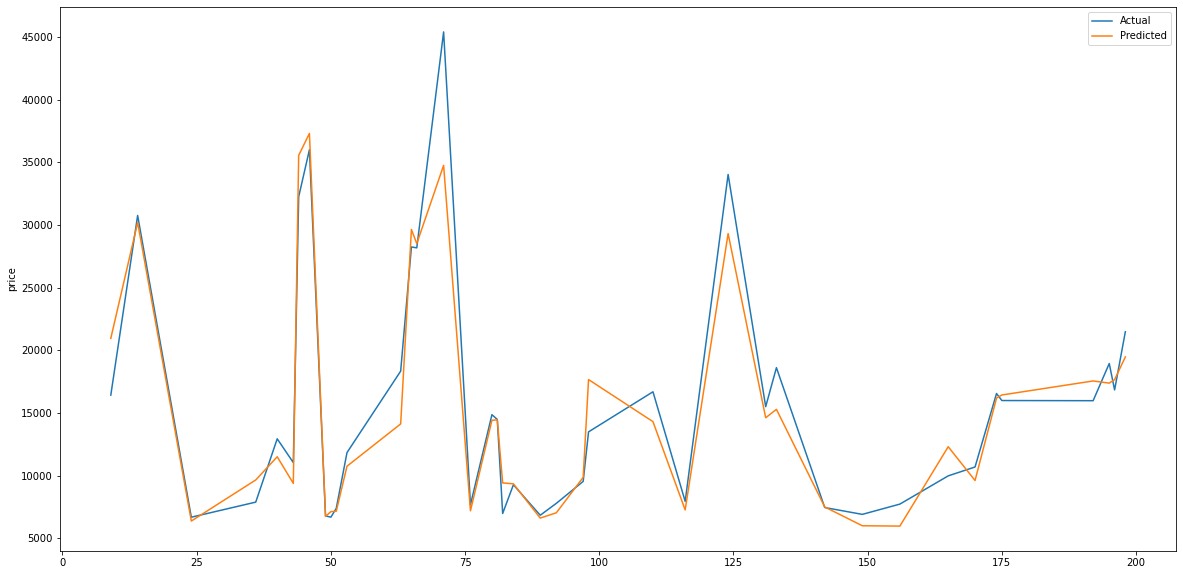

In [22]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [23]:
for p,a in zip(y_pred[:10],y_test[:10]):
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f}")

 34753  -   45400 - -10647
  6386  -    6692 -   -306
  7168  -    7395 -   -227
 16194  -   16558 -   -364
  9871  -    9549 -    322
 11514  -   12945 -  -1431
 29318  -   34028 -  -4710
  9356  -    9279 -     77
  7508  -    7463 -     45
 14624  -   15510 -   -886


In [24]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

 34753  -   45400 - -10647 - 23.45
  6386  -    6692 -   -306 -  4.57
  7168  -    7395 -   -227 -  3.07
 16194  -   16558 -   -364 -  2.20
  9871  -    9549 -    322 -  3.37
 11514  -   12945 -  -1431 - 11.06
 29318  -   34028 -  -4710 - 13.84
  9356  -    9279 -     77 -  0.83
  7508  -    7463 -     45 -  0.60
 14624  -   15510 -   -886 -  5.71



**Model with Standardization**

In [25]:
cars = pd.read_csv("final_cars.csv")

In [26]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [27]:
X = pd.get_dummies(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
## Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train,columns = X.columns)

In [32]:
X_test = pd.DataFrame(X_test,columns = X.columns)

In [33]:
X_test.head()

,curb-weight,engine-size,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,2.413275,4.982797,-2.238975,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,-1.148408,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
1,-1.071322,-0.923353,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
2,-1.150058,-0.895755,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
3,0.921319,1.312152,-1.054724,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,-1.148408,1.148408,-0.197386,-0.179605,1.362770,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
4,-0.439410,-0.095388,0.425590,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799


In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6364593.06
Root Mean Squared Error : 2522.81
Mean Absolute Error : 1636.91
R2 Score: 0.93


**RandomForestRegressor**

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [39]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9786217304356867


In [40]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.95


In [41]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  4122874.6722222227
RMSE :  2030.4863142169224


In [42]:
for f,v in sorted(zip (X_train.columns, model.feature_importances_),key = lambda t : t[1], reverse = True):
      print(f"{f:30} {v:0.2f}")

engine-size                    0.50
curb-weight                    0.35
highway-mpg                    0.09
make_bmw                       0.01
make_volvo                     0.01
body-style_sedan               0.01
make_audi                      0.00
make_toyota                    0.00
fuel-type_gas                  0.00
drive-wheels_fwd               0.00
fuel-type_diesel               0.00
body-style_hatchback           0.00
num-of-doors_two               0.00
make_peugot                    0.00
body-style_hardtop             0.00
body-style_wagon               0.00
body-style_convertible         0.00
make_porsche                   0.00
drive-wheels_rwd               0.00
drive-wheels_4wd               0.00
num-of-doors_four              0.00
make_volkswagen                0.00
make_alfa-romero               0.00
make_mercury                   0.00
make_mitsubishi                0.00
make_isuzu                     0.00
make_mercedes-benz             0.00
make_subaru                 

<AxesSubplot:ylabel='price'>

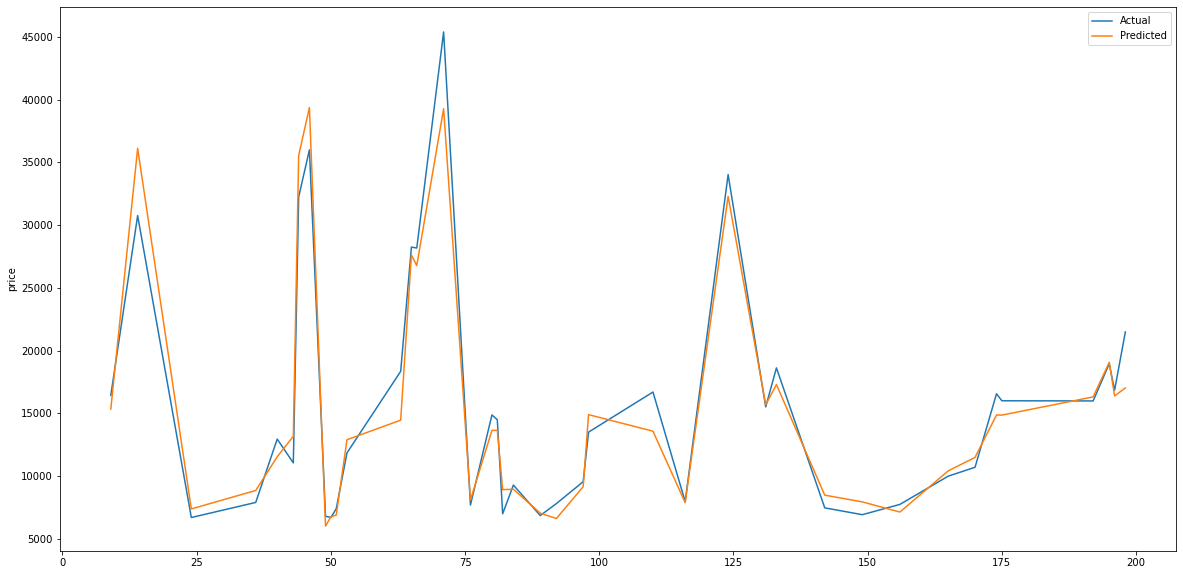

In [43]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

**SGDRegressor**

In [44]:
from sklearn.linear_model import SGDRegressor

In [45]:
X_mini = X[['curb-weight','engine-size','highway-mpg']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
model = SGDRegressor(random_state=100)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9270594276291244


In [50]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [51]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6142786.368307506
RMSE :  2478.464518266805
